In [1]:
!pip install opendatasets -q

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [3]:
# Download dataset
od.download("https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachin419
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images


100%|██████████| 119M/119M [00:00<00:00, 1.31GB/s]

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/chest-ctscan-images/Data/test"
test_data_dir = "/content/chest-ctscan-images/Data/train"
validation_data_dir = "/content/chest-ctscan-images/Data/valid"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 315 files belonging to 4 classes.
Found 315 files belonging to 4 classes.
Found 613 files belonging to 4 classes.


In [ ]:
class_names = train_data.class_names
class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [ ]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


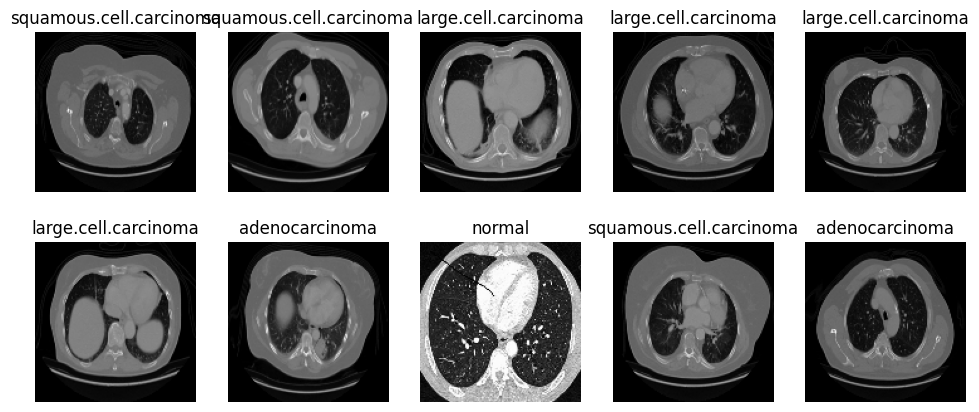

In [ ]:
# plot data sample
plt.figure(figsize=(12,5))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)


tf.Tensor(
[[[[0.76171875 0.76171875 0.76171875]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.19140625 0.19140625 0.19140625]
   ...
   [0.12112427 0.12112427 0.12112427]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.      

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

#**Transfer Learning**

In [ ]:
from tensorflow.keras import Model, Input, layers

In [ ]:
pretrained_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3),
    pooling='max'
)

for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
# data_augmentation = tf.keras.Sequential(
#   [
#     tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#   ]
# )

In [ ]:
inputs = Input(shape=(128, 128, 3))
x = pretrained_model(inputs)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(4, activation='softmax')(x)


In [ ]:
model = Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 1024)           │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,124,516 (61.51 MB)

 Trainable params: 9,087,012 (34.66 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=12,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.2908 - loss: 2.5794 - val_accuracy: 0.3873 - val_loss: 1.6413
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.4320 - loss: 1.3583 - val_accuracy: 0.5238 - val_loss: 1.2959
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.5115 - loss: 1.1136 - val_accuracy: 0.6667 - val_loss: 0.8419
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.6216 - loss: 0.8267 - val_accuracy: 0.6444 - val_loss: 0.8095
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.6847 - loss: 0.7959 - val_accuracy: 0.7460 - val_loss: 0.7127
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.7503 - loss: 0.6983 - val_accuracy: 0.7365 - val_loss: 0.6204
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.7771 - loss: 0.5880 - val_accuracy: 0.8413 - val_loss: 0.4588
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.8104 - loss: 0.5228 - val_accuracy: 0.78

In [ ]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 87.790 seconds


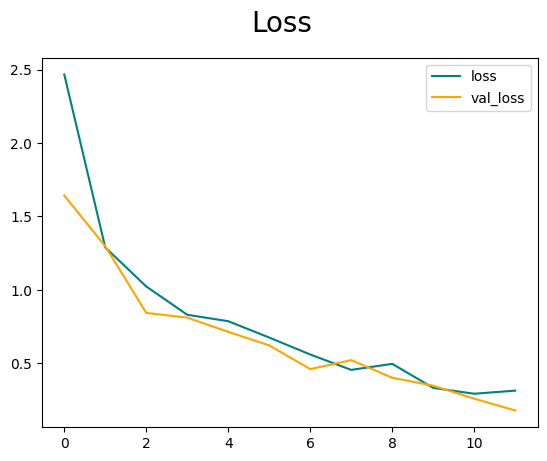

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

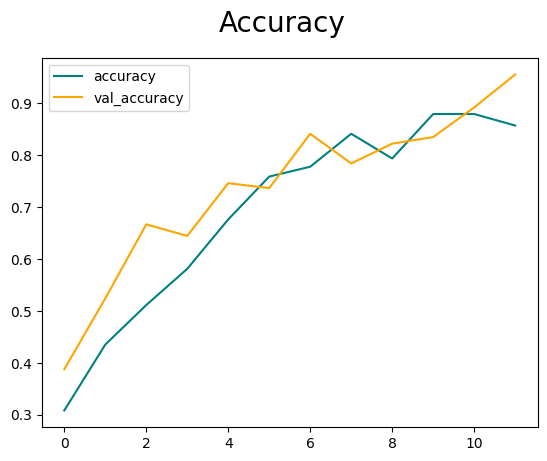

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

In [ ]:
!pip install opencv-python -q

In [ ]:
import cv2

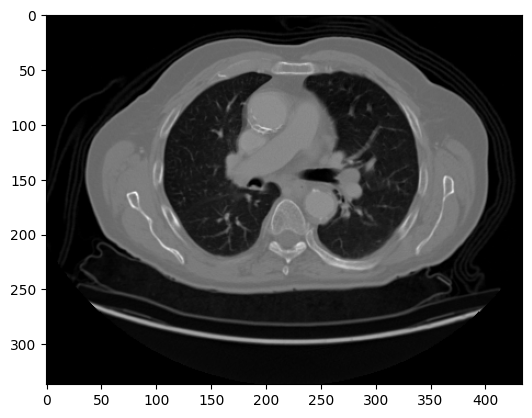

In [ ]:
img = cv2.imread('/content/chest-ctscan-images/Data/test/squamous.cell.carcinoma/000112.png')
plt.imshow(img)
plt.show()

In [ ]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [ ]:
scaled_image.shape

TensorShape([128, 128, 3])

In [ ]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [ ]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step


In [ ]:
yhat

array([[0.02294838, 0.02119373, 0.00223639, 0.95362157]], dtype=float32)

In [ ]:
class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [ ]:
predicted_class_index = np.argmax(yhat)
predicted_class_name = class_names[predicted_class_index]
print(f"The predicted class is: {predicted_class_name}")

The predicted class is: squamous.cell.carcinoma


##Save Model

In [ ]:
#Save Model as Keras
model.save("Chest_cancer_detection_model.keras")

In [ ]:
#Save Model as h5
model.save("Chest_cancer_detection_model.h5")

##Load Model

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

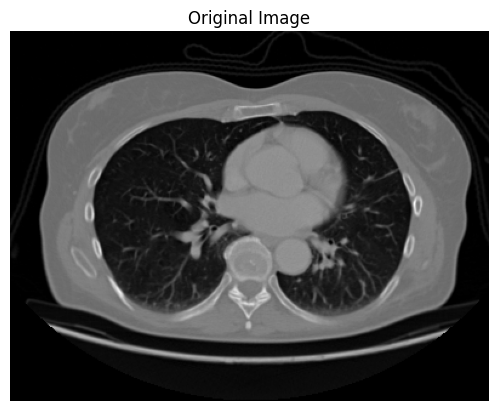

In [ ]:
# Load the image
new_img_path = '/content/chest-ctscan-images/Data/test/large.cell.carcinoma/000111.png'
new_img = cv2.imread(new_img_path)
plt.imshow(new_img)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
#Using Keras
cancer_prediction_model = load_model('Chest_cancer_detection_model.keras')

In [ ]:
# Preprocess the image
resized_new_img = tf.image.resize(new_img, IMAGE_SIZE)
scaled_new_img = resized_new_img/255.0
input_image = np.expand_dims(scaled_new_img, 0)

# Make a prediction
predictions = cancer_prediction_model.predict(input_image)

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class for the new image is: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
The predicted class for the new image is: large.cell.carcinoma
